H3.1 Least-squares solution via gradient computation for a convolutional system:  
(a) Linear system:Let us consider a linear model $y=Wx+b$, where W is an $m×d$ matrix and $b∈R_m$. Write an expression for the optimal values of $W,b$ that minimize the following cost function:
$$ J(W,\mathbf{b}) = \frac{1}{2} || y- W\mathbf{x}  - \mathbf{b}||^2$$

To find the optimal solutions we must find the gradient of J w.r.t $W$ and $\mathbf{b}$. This is can be done by solving for the partials $\partial J /\partial W_{ij}$ and $\partial J /\partial b_i$. First we rewrite $J(W,\mathbf{b})$ to make finding the partial easier.
$$J(W, \mathbf{b}) = \frac{1}{2} \sum_i \left(y_i - \sum_jW_{ij}x_{j} - b_i\right)^2 $$
From the equation above we can see only one term from the outer summation will contribute to the partials.
$$\frac{\partial J}{\partial W_{ij}} = \frac{\partial}{\partial W_{ij}} \left[\frac{1}{2}\left(y_i - \sum_jW_{ij}x_{j} - b_i\right)^2 \right] \\ = -x_j(y_i - \sum_j W_{ij}x_j - b_i)$$
$$\frac{\partial J}{\partial b_i} = \frac{\partial}{\partial b_i} \left[\frac{1}{2}\left(y_i - \sum_jW_{ij}x_{j} - b_i\right)^2 \right] \\ = -(y_i - \sum_j W_{ij}x_j - b_i)$$

Setting the two equations to zero and subtracting them gives,
$$ 0 = -(x_j -1)y_i +(x_j-1)\sum_j W_{ij}x_j + (x_j-1)b_i$$
This is exactly equal to $y_i = \sum_j W_{ij}x_j + b_i$ which is the equation of our linear model. Therefore the optimal values of $W$ and $\mathbf{b}$ are when $-\sum_jW_{ij}x_j = b_i$ so $y = 0$ and $J(W,\mathbf{b}) = 0$.

(b) Convolutional system:Let us consider the following linear model $y = Wx+\mathbf{b}$, where $W$ is a Toeplitz matrix corresponding to a filter $w$ of length $k$. We can write the $d+k−1×d$ Toeplitz matrix as
$$W = \begin{bmatrix} \mathbf{w}_1 & 0 & 0 & \cdots & 0 & 0 \\
                      \mathbf{w}_2 & \mathbf{w}_1 & 0 & \cdots & 0 & 0 \\
                      \mathbf{w}_3 & \mathbf{w}_2 & \mathbf{w}_1 & \cdots & 0 & 0 \\
                      \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
                      \mathbf{w}_k & \mathbf{w}_{k-1} & \mathbf{w}_{k-2} & \cdots & \cdots & \cdots \\
                      0 & \mathbf{w}_k & \mathbf{w}_{k-1} & \ddots & \cdots & \vdots \\
                      0 & 0 & \mathbf{w}_k & \ddots & \cdots & \vdots \\
                      \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
                      0 & 0 & 0 & \cdots & \mathbf{w}_k & \mathbf{w}_{k-1} \\
                      0 & 0 & 0 & \cdots& 0 & \mathbf{w}_k \end{bmatrix} $$  
We can also define the linear model above as $\mathbf{y} = \mathbf{w}*\mathbf{x} + \mathbf{b}$, where $\mathbf{w}*\mathbf{x}$ denotes the convolution of two vectors that can be defined as 
$$ (\mathbf{w}*\mathbf{x})_j = \sum_{i=1}^d \mathbf{x}_i\mathbf{w}_{j-i+1},$$  
where $\mathbf{w}_i$ denotes the $i$th entry in the vector $\mathbf{w}$ and $\mathbf{w}_i = 0 \text{ for } i < 1 \text{ and } i > k$. With our definition above, we assume that j is only valid for  $1\leq j \leq d+k-1$.  
Derive an expression for the optimal values of $\mathbf{w},\mathbf{b}$ that minimize the following cost function:
$$ J(W,\mathbf{b}) = \frac{1}{2}||\mathbf{y} - \mathbf{w}*\mathbf{x} - \mathbf{b}||^2.$$

Like part (a) we are going to derive expressions for $\partial J/\partial \mathbf{w}_i$ and $\partial J/\partial \mathbf{b}_i$. Additionally, we are going to rewrite $J$.  
$$ J(W, \mathbf{b}) = \frac{1}{2} \sum_{j=1}^{d+k-1} \left(y_i - \sum_{i=1}^d \mathbf{x}_i\mathbf{w}_{j-i+1} - b_i\right)^2 $$
  
$$\frac{\partial J}{\partial \mathbf{w}_i} = -\sum_{j=1}^{d+k-1} \left(y- \sum_{i=1}^d \mathbf{x}_i\mathbf{w}_{j-i+1} - b_i\right)x_i$$
$$ \frac{\partial J}{\partial \mathbf{w}_i} = \sum_{j=1}^{d+k-1} \left(y- \sum_{i=1}^d \mathbf{x}_i\mathbf{w}_{j-i+1} - b_i\right)$$
This gives simiar results to (a). $\mathbf{w}$ and $\mathbf{b}$ are when $-\mathbf{w}*\mathbf{x} = b$.

H3.2 In this question, we will learn how to implement backpropagation (or backprop) for “vanilla” neural networks (or Multi-Layer Perceptrons). You will begin by writing the forward and backward passes for different types of layers and then go on to train a shallow ConvNet on the CIFAR-10 dataset in Python.  
(a) The iPython notebook two_layer_net.ipynb will walk you through implementing a two-layer neural network on CIFAR-10. You will write a hard-coded 2-layer neural network, implement its backward pass, and tune its hyperparameters.  
The structure of the two layer fully connected network is: input→fully-connected-layer→ReLU activation→fully-connected-layer→softmax. If $x$ is input to the network as a row vector then the forward propagation calculates a prediction vector $\hat y $ as follows:
$$h_1 = \text{ReLU}(xW_1 + b_1) \\
\hat y = \text{softmax}(h_1W_2 + b_2)$$  
where $h_1$ is the intermediate output in the hidden layer, $W_1$, $b_1$ and $W_2$, $b_2$ are first and second layer weights and biases respectively. Note that these definitions are “transposed” version of the notations we used in our lecture. For a vector of length $d,W_1$ will be a $d×K_1$, where $d$ is the size of input vector and $K_1$ is the output size of the first layer.


Turned in as a seperate zip file with parts (a) - (c) combined

H3.3 In this question you will solve the XOR problem using 2-layer neural network using ReLu nonlinearities. Remember that in the class, we used step/sign nonlinearities.  
Suppose you are given four training samples from $\mathbb{R}^2$ distributed in an XOR pattern

(a) Write down the values of $W^1,W^2, b^1, b^2$ that you think will correctly classify data.

$$
W^1 = \begin{bmatrix} -1 & -2 \\ 1 & 1 \end{bmatrix} \qquad W^2 = \begin{bmatrix} 0.5 & 2 \end{bmatrix} \\
b^1 = \begin{bmatrix} 1\\ -1 \end{bmatrix} \qquad b^2 = -1
$$

In [79]:
import numpy as np

x = np.array([[-1, -1], 
              [-1, 1], 
              [1, -1],
              [1, 1]])
W1 = np.array([[-1, -2], 
               [1, 1]])
W2 = np.array([[0.5, 2]])
b1 = np.array([[1], [-1]])
b2 = -1

(b) Plot a decision boundary for the first node in layer 1; that is, $w^1_{11}x(1) + w^1_{12}x(2) + b^1_1 = 0$

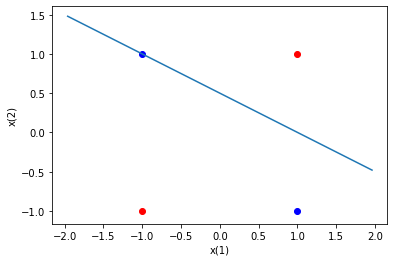

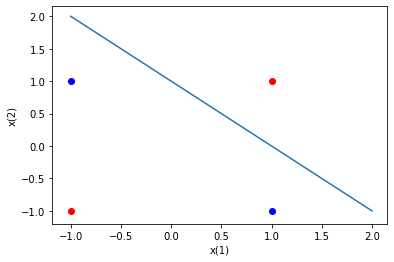

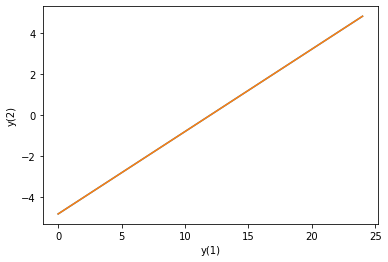

In [187]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# z1 = np.matmul(W1, x.T) + b1
# y1 = np.maximum(0,z1)
# z2 = np.matmul(W2,y1) + b2
# y2 = np.maximum(0,z2)

k = 101
p1 = []
p2 = []
for x1 in np.linspace(-2, 2, k):
    for x2 in np.linspace(-2,2,k):
        x = np.array([[x1, x2]])
        z1 = (np.matmul(W1,x.T) + b1).reshape(2,)
        if(abs(z1[0]) < 0.01):
            p1.append((x1,x2))
        if(abs(z1[1]) < 0.01):
            p2.append((x1,x2))
p1 = np.array(p1)
p2 = np.array(p2)
        
p3 =  []
for y1 in np.linspace(-5, 5, k):
    for y2 in np.linspace(-5,5,k):
        y = np.array([[y1, y2]])
        z2 = (np.matmul(W2,y.T) + b2).reshape(1,)
        if(abs(z2) < 0.01):
            p3.append((y1,y1))
p3 = np.array(p3)


fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()

ax1 = fig1.add_subplot(111)
ax1.plot(p1[:,0], p1[:,1])
ax1.scatter([1, -1], [-1, 1], label='0', c='blue')
ax1.scatter([-1, 1], [-1, 1], label='1', c='red')
# ax1.set_xlim(-1,1)
ax1.set_xlabel('x(1)')
ax1.set_ylabel('x(2)')

ax2 = fig2.add_subplot(111)
ax2.plot(p2[:,0], p2[:,1])
ax2.scatter([1, -1], [-1, 1], label='0', c='blue')
ax2.scatter([-1, 1], [-1, 1], label='1', c='red')
# ax2.set_xlim(0,1)
ax2.set_xlabel('x(1)')
ax2.set_ylabel('x(2)')

ax3 = fig3.add_subplot(111)
ax3.plot(p3)
# ax3.set_xlim(0,1)
ax3.set_xlabel('y(1)')
ax3.set_ylabel('y(2)')
plt.show()